## Austin, Texas Airbnb Data
http://insideairbnb.com/get-the-data/
- Data compiled on March 20th, 2022

In [726]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
from sklearn.model_selection import train_test_split as tst

In [727]:
df = pd.read_csv("data/main.csv")

In [728]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11972 non-null  int64  
 1   listing_url                                   11972 non-null  object 
 2   scrape_id                                     11972 non-null  int64  
 3   last_scraped                                  11972 non-null  object 
 4   name                                          11972 non-null  object 
 5   description                                   11808 non-null  object 
 6   neighborhood_overview                         7059 non-null   object 
 7   picture_url                                   11971 non-null  object 
 8   host_id                                       11972 non-null  int64  
 9   host_url                                      11972 non-null 

## Dataframe Evaluation

In [730]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220312074014,2022-03-13,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78702,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Patio or balcony"", ""Hair dryer"", ""Security c...",$240.00,2,90,2.0,3.0,90.0,90.0,2.0,90.0,NaN,t,7,18,44,305,2022-03-13,585,42,5,2009-03-08,2022-03-07,4.83,4.87,4.85,4.89,4.81,4.73,4.78,NaN,f,1,1,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20220312074014,2022-03-31,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, Texas, United States",78729,NaN,30.45697,-97.78422,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Hot water"", ""Hea...",$42.00,1,14,1.0,1.0,14.0,14.0,1.0,14.0,NaN,t,0,0,0,0,2022-03-31,264,3,0,2010-04-10,2021-07-03,4.90,4.90,4.86,4.91,4.94,4.74,4.92,NaN,f,1,0,1,0,1.81
2,6413,https://www.airbnb.com/rooms/6413,20220312074014,2022-03-31,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Austin, Texas, United States",78704,NaN,30.24885,-97.73587,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Kitchen"", ""Microwave"", ""Stove"", ""Shampoo"", ""...",$109.00,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2022-03-31,117,2,0,20

In [731]:
#drop columns that have no potential of giving info
df.drop(['neighborhood_overview', 'host_name','host_about', 'host_location', 'host_neighbourhood', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'picture_url', 'host_id', 
         'host_url','host_thumbnail_url', 'host_picture_url', 'neighbourhood_cleansed', 'property_type',
         'neighbourhood_group_cleansed', 'neighbourhood', 'bathrooms', 'calendar_updated', 'license'], axis=1, inplace=True)

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    11969 non-null  object 
 1   host_response_time                            8523 non-null   object 
 2   host_response_rate                            8523 non-null   object 
 3   host_acceptance_rate                          9110 non-null   object 
 4   host_is_superhost                             11969 non-null  object 
 5   host_listings_count                           11969 non-null  float64
 6   host_total_listings_count                     11969 non-null  float64
 7   host_verifications                            11972 non-null  object 
 8   host_has_profile_pic                          11969 non-null  object 
 9   host_identity_verified                        11969 non-null 

### What we need to do to clean the appropriate data
- host_since
    - Get the length of time the the host has been a host at airbnb
- host_response_time
    - The categories are
        - within an hour
        - within a day
        - within a few hours
        - Nan
    - Will leave as is, will eventually need to create indicator variables
- host_response_rate / host_acceptance_rate
    - will need to strip the percenage sign from the string
 
- host_neighbourhood removed
    - location data can be captured by the latitude and longitude
    - the cardinality of the predictor is too large to use
- host_verifications
    - separate the list of host verifications into separate predictors
    - got total verification count
- property_type / room_type
    - dropped property type as it gave the same info as room type
- bathrooms_text
    - got whether it was private or not
    - got count of bathrooms
- Price
    - removed dollar sign
- look through amenities
    - created factors for the top amenities listed on https://www.airbnb.com/resources/hosting-homes/a/the-amenities-guests-want-
    - removed dryer due to inconsistencies with text and other wording. Confused a lot with hair dryer. Couldn't capture variable formats in combination with washer.
    - Amenities based off of Airbnb.com
    



In [733]:
def get_host_time_length(date_compiled, form):
    df.dropna(subset='host_since', inplace=True)
    "create column that counts the number of days a host has been with Airbnb"
    date_compiled = dt.datetime.strptime(date_compiled, form)
    df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')
    df['host_length'] = (date_compiled - df['host_since']).dt.days
    

In [734]:
def clean_signs():
    "remove parentheses from response_rate/acceptance rate. Removed dollar sign from price"
    df['host_response_rate'] = df['host_response_rate'].str.replace("%", "").astype(float)
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace("%", "").astype(float)
    df['price'] = df['price'].str.replace(r"[,\$]", "").astype(float)

In [735]:
def clean_list_as_string(val):
    "function for lambda to change from list in a string to list of strings"
    val = val.strip("[]").replace(r"'", "").replace(", ", ",").replace('"', '').split(",")
    if '' in val :
        val.remove('')
    if 'None' in val:
        val.remove('None')
    return val

def clean_verification():
    "clean each host_verification string"
    df['host_verifications'] = df['host_verifications'].apply(clean_list_as_string)
    
def create_verification_count(new_col_name):
    "create new column for verfication count"
    clean_verification()
    df[new_col_name] = df['host_verifications'].str.len()

In [736]:
def create_bathroom_type(new_col_name):
    "Create column for if bathroom shared or not."
    df[new_col_name] = np.where(df['bathrooms_text'].str.contains(r'[sS]hared'), True, False)
    
def create_bathroom_count(new_col_name):
    "Create column for bathroom count."
    df[new_col_name] = df['bathrooms_text'].str.extract(r'(\d*\.?\d+)').astype(float)

In [737]:
#removed dryer from list. too much inconsistency with different texts with hair dryer and dryer

def clean_amenities():
    "Clean each amenities string. Change from string of list to list of strings."
    df['amenities'] = df['amenities'].apply(clean_list_as_string)

def create_amenity_boolean_df(amenity_series, amenity_list):
    "Returns a dataframe stating whether each instance contained the specific amenity in their list"
    amenity_dict = dict()
    for amenity in amenity_list:
        amenity = amenity.lower()
        amenity_dict[amenity] = amenity_series.apply(lambda x: any(amenity in string.lower() for string in x))
    return pd.DataFrame(amenity_dict)

def add_amenities(df, amenity_series, amenity_list):
    "Concatenate the boolean_df for the dataframe to the dataframe passed in the function"
    boolean_df = create_amenity_boolean_df(amenity_series, amenity_list)
    return pd.concat([df, boolean_df], axis=1)

In [738]:
def change_to_boolean(df, col_names):
    "Change orignal boolean columns to boolean types"
    for col in col_names:
        df[col] = df[col].map({'t':True, 'f':False})

In [739]:
amenity_try = ['pool', 'wifi', 'kitchen', 'free parking', 'free street parking','hot tub', 'washer'
               ,'air conditioning', 'workspace', 'pet', 'gym']

bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 
             'instant_bookable']

get_host_time_length('2022-03-20', form='%Y-%m-%d')
clean_signs()
create_verification_count('verification_count')
create_bathroom_type('shared_rr')
create_bathroom_count('rr_count')
clean_amenities()
df = add_amenities(df, df['amenities'], amenity_try)

#Drop uncessary columns since cleaning finished
df.drop(['host_since', 'host_verifications', 'bathrooms_text', 'amenities', 'calendar_last_scraped', 
         'first_review', 'last_review'], inplace=True, axis=1)

#updating last few datatypes
change_to_boolean(df, bool_cols)

/var/folders/dv/14k38qsd37xgbxgkxr0c7fgm0000gn/T/ipykernel_864/3919946709.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace(r"[,\$]", "").astype(float)


In [740]:
df.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_length,verification_count,shared_rr,rr_count,pool,wifi,kitchen,free parking,free street parking,hot tub,washer,air conditioning,workspace,pet,gym
0,within an hour,100.0,94.0,True,1.0,1.0,True,True,30.26057,-97.73441,Entire home/apt,3,1.0,2.0,240.0,2,90,2.0,3.0,90.0,90.0,2.0,90.0,True,7,18,44,305,585,42,5,4.83,4.87,4.85,4.89,4.81,4.73,4.78,False,1,1,0,0,3.69,4780,4,False,1.0,False,True,True,False,True,False,False,True,False,False,False
1,NaN,NaN,100.0,True,1.0,1.0,True,True,30.45697,-97.78422,Private room,2,1.0,1.0,42.0,1,14,1.0,1.0,14.0,14.0,1.0,14.0,True,0,0,0,0,264,3,0,4.90,4.90,4.86,4.91,4.94,4.74,4.92,False,1,0,1,0,1.81,4777,6,True,1.0,False,True,True,True,False,False,False,True,False,False,False
2,within an hour,100.0,100.0,True,1.0,1.0,True,True,30.24885,-97.73587,Entire home/apt,2,NaN,1.0,109.0,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,True,0,0,0,0,117,2,0,4.97,4.99,4.99,4.99,4.98,4.86,4.94,True,1,1,0,0,0.78,4720,8,False,1.0,False,True,True,True,True,False,False,True,True,False,False
3,within an hour,100.0,98.0,True,2.0,2.0,True,True,30.26034,-97.76487,Entire home/apt,3,1.0,2.0,325.0,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,True,9,19,39,107,268,30,3,4.97,4.97,4.96,4.99,4.97,4.97,4.89,True,1,1,0,0,2.09,4717,5,False,1.0,False,True,True,True,True,False,True,True,True,False,False
4,within a day,83.0,29.0,False,1.0,1.0,True,False,30.23466,-97.73682,Entire home/apt,2,1.0,1.0,44.0,3,90,3.0,4.0,90.0,90.0,3.4,90.0,True,0,0,26,26,48,2,0,4.53,4.49,4.67,4.83,4.86,4.64,4.57,False,1,1,0,0,0.33,4635,3,False,1.0,False,True,True,False,True,False,False,True,False,False,False


# Handling Missing Values
To prevent data leakage, we will need to split our data into a training set and a test set. We can use values from the training set and impute them into the missing values of both the training and test set. This test set will be used once we have finalized our model. Also, we want to remove any rows that do not have a price listed. If a property is listed on Airbnb, it should have a rate that isn't free.

In [741]:
from sklearn.model_selection import train_test_split as tst
train_df, test_df = tst(df, test_size=0.10, random_state=15413)
df_list = [train_df, test_df]

In [742]:
# Remove other rows where the price was 0.
for df1 in df_list:
    df1 = df1[df1['price'] != 0]

In [743]:
percent_missing = (train_df.isnull().sum() * 100) / len(train_df)
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 '% missing': percent_missing})
missing_value_df = missing_value_df[missing_value_df['% missing'] != 0].sort_values(
    by='% missing', ascending=False).reset_index(drop=True)
missing_value_df

,column_name,% missing
0,host_response_time,28.908281
1,host_response_rate,28.908281
2,review_scores_value,24.944300
3,review_scores_location,24.944300
4,review_scores_checkin,24.935017
5,review_scores_cleanliness,24.925733
6,review_scores_communication,24.925733
7,review_scores_accuracy,24.925733
8,reviews_per_month,24.313034
9,review_scores_rating,24.313034


We can see all characteristics other than host and review characteristics have a small amount of missing values. We can impute these predictors with each predictors corresponding median. However, we will need to do further research on why 25% of host and review characteristics are missing.

In [744]:
median_cols = missing_value_df[missing_value_df['% missing'] <= 10]['column_name'].tolist()
for col in median_cols:
    median = train_df[col].median()
    for df1 in df_list:
        df1[col] = df1[col].fillna(median)
        

In [745]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 1069 to 8812
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            7658 non-null   object 
 1   host_response_rate                            7658 non-null   float64
 2   host_acceptance_rate                          8187 non-null   float64
 3   host_is_superhost                             10772 non-null  bool   
 4   host_listings_count                           10772 non-null  float64
 5   host_total_listings_count                     10772 non-null  float64
 6   host_has_profile_pic                          10772 non-null  bool   
 7   host_identity_verified                        10772 non-null  bool   
 8   latitude                                      10772 non-null  float64
 9   longitude                                     10772 non-nul

In [746]:
missing_cols = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
        'review_scores_location', 'review_scores_value', 'reviews_per_month']

<AxesSubplot:>

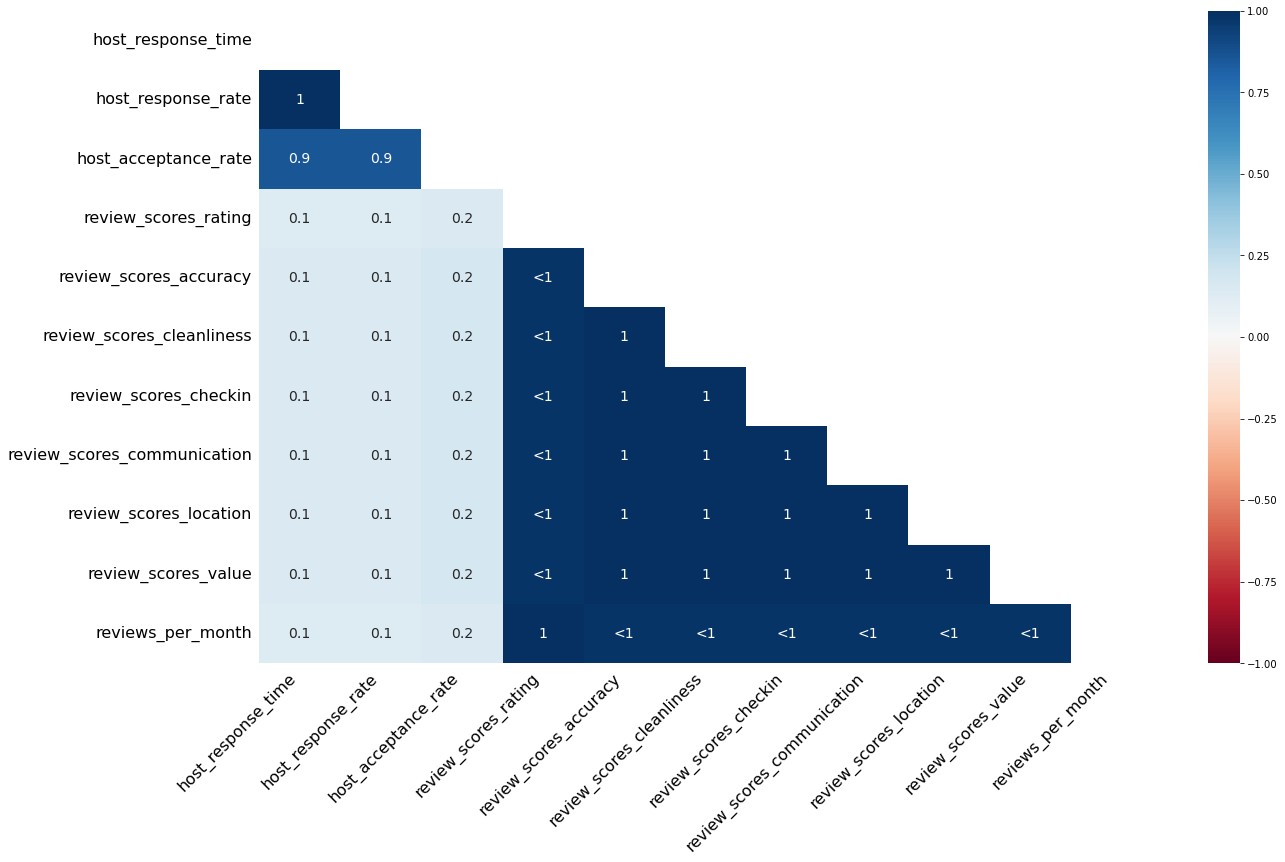

In [747]:
msno.heatmap(train_df)

The missingness of host characteristics is highly correlated with the missingness of other host characteristics. Also, the missingness of review characteristics is highly correlated with the missingness of other review characteristics. This could be due to the failure to find all host and/or review information for a listing. Is this a problem for hosts who are new to Airbnb?

Text(0.5, 1.6, 'Host Length(Days) with Airbnb When Missing Variable')

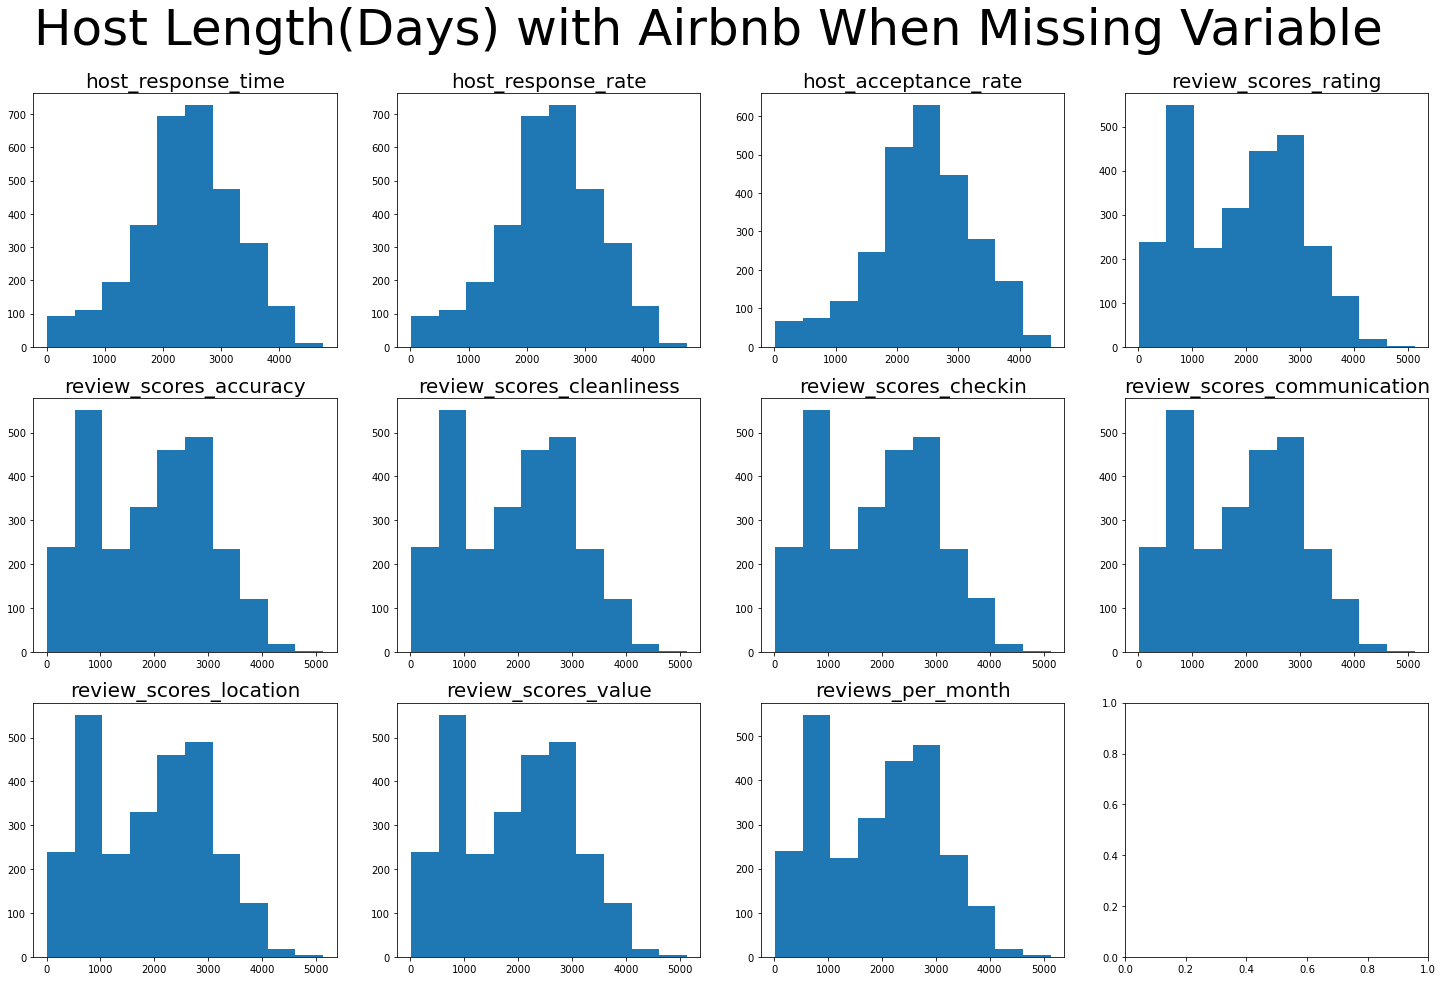

In [748]:
fig, ax = plt.subplots(3,4, figsize=(25,12))
ax = ax.ravel()
for i in range(len(missing_cols)):
    col_name = missing_cols[i]
    ax[i].hist(train_df[train_df[col_name].isnull()]['host_length'])
    ax[i].set_title(col_name, size=20)
plt.subplots_adjust(top=1.5, bottom=0.5)
fig.suptitle('Host Length(Days) with Airbnb When Missing Variable', fontsize=50, y=1.6)

The plot shows a histogram of the number of days the host as been with Airbnb for missing values of the predictor in the subplot title. All three host characteristics follow a normal distribution. A majority of the missing host characteristics are for hosts that have been with Airbnb for 7 to 8 years.

The review predictors do not seems to follow a normal distribution. Many of the hosts have been with Airbnb for less than 1000 days. However, plenty of hosts missing these predictors have been with Airbnb for 2000 days or longer. Airbnb states **review_scores_rating** is based on the customer's overall experience. The other review scores are subcategories of this experience. We can remove these predictors without losing much information.
https://www.airbnb.com/help/article/1257/star-ratings


In [749]:
review_drops = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
for df1 in df_list:
    df1.drop(review_drops, axis=1, inplace=True)

Next, we need to check if these variables are missing completly at random, missing at random, or missing not at random. Once determined, we can appropriately impute values. We will create indicator variables to represent if a value is missing in any of these predictors.

In [750]:
missing_cols = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating']

#create missing col indicators
for df1 in df_list:
    for col in missing_cols:
        col_name = col + '_missing_ind'
        df1[col_name] = df1[col].apply(lambda x: 1 if x!=x else 0)

In [751]:
train_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_length,verification_count,shared_rr,rr_count,pool,wifi,kitchen,free parking,free street parking,hot tub,washer,air conditioning,workspace,pet,gym,host_response_time_missing_ind,host_response_rate_missing_ind,host_acceptance_rate_missing_ind,review_scores_rating_missing_ind
1069,NaN,NaN,NaN,False,1.0,1.0,True,True,30.23557,-97.71059,Entire home/apt,7,3.0,3.0,215.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,True,0,0,0,0,1,0,0,5.00,False,1,1,0,0,2594,4,False,3.0,False,True,True,True,False,False,True,True,True,False,False,1,1,1,0
604,NaN,NaN,NaN,False,1.0,1.0,True,False,30.29925,-97.73819,Entire home/apt,10,4.0,6.0,1200.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,False,0,0,0,0,0,0,0,NaN,False,1,1,0,0,2948,2,False,3.0,False,True,True,True,False,False,True,True,False,False,False,1,1,1,1
5181,within a few hours,80.0,91.0,False,1.0,1.0,True,False,30.16034,-97.74524,Entire home/apt,8,4.0,10.0,299.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,18,48,78,78,40,14,1,4.87,False,1,1,0,0,1112,2,False,2.5,False,True,True,True,True,False,True,True,False,False,False,0,0,0,0
5432,within an hour,100.0,100.0,True,1.0,1.0,True,True,30.39592,-97.69668,Entire home/apt,10,4.0,4.0,442.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,0,7,10,35,32,16,0,4.84,False,1,1,0,0,1359,4,False,2.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
2832,NaN,NaN,NaN,False,1.0,1.0,True,False,30.28678,-97.74868,Entire home/apt,2,2.0,2.0,60.0,1,7,1.0,1.0,7.0,7.0,1.0,7.0,False,0,0,0,0,3,0,0,4.33,False,1,1,0,0,1838,4,False,2.0,False,True,True,True,False,False,False,True,True,False,False,1,1,1,0


In [752]:
# get list of predictors not under evaluation for missingness
full_predictors = list(train_df.columns)
for missing in missing_cols:
    full_predictors.remove(missing)
full_predictors = full_predictors[:46]
full_predictors

['host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_length',
 'verification_count',
 'shared_rr',
 'rr_count',
 'pool',
 'wifi',
 'kitchen',
 'free parking',
 'free street parking',
 'hot tub',
 'washer',
 'air conditioning',
 'workspace']

<AxesSubplot:>

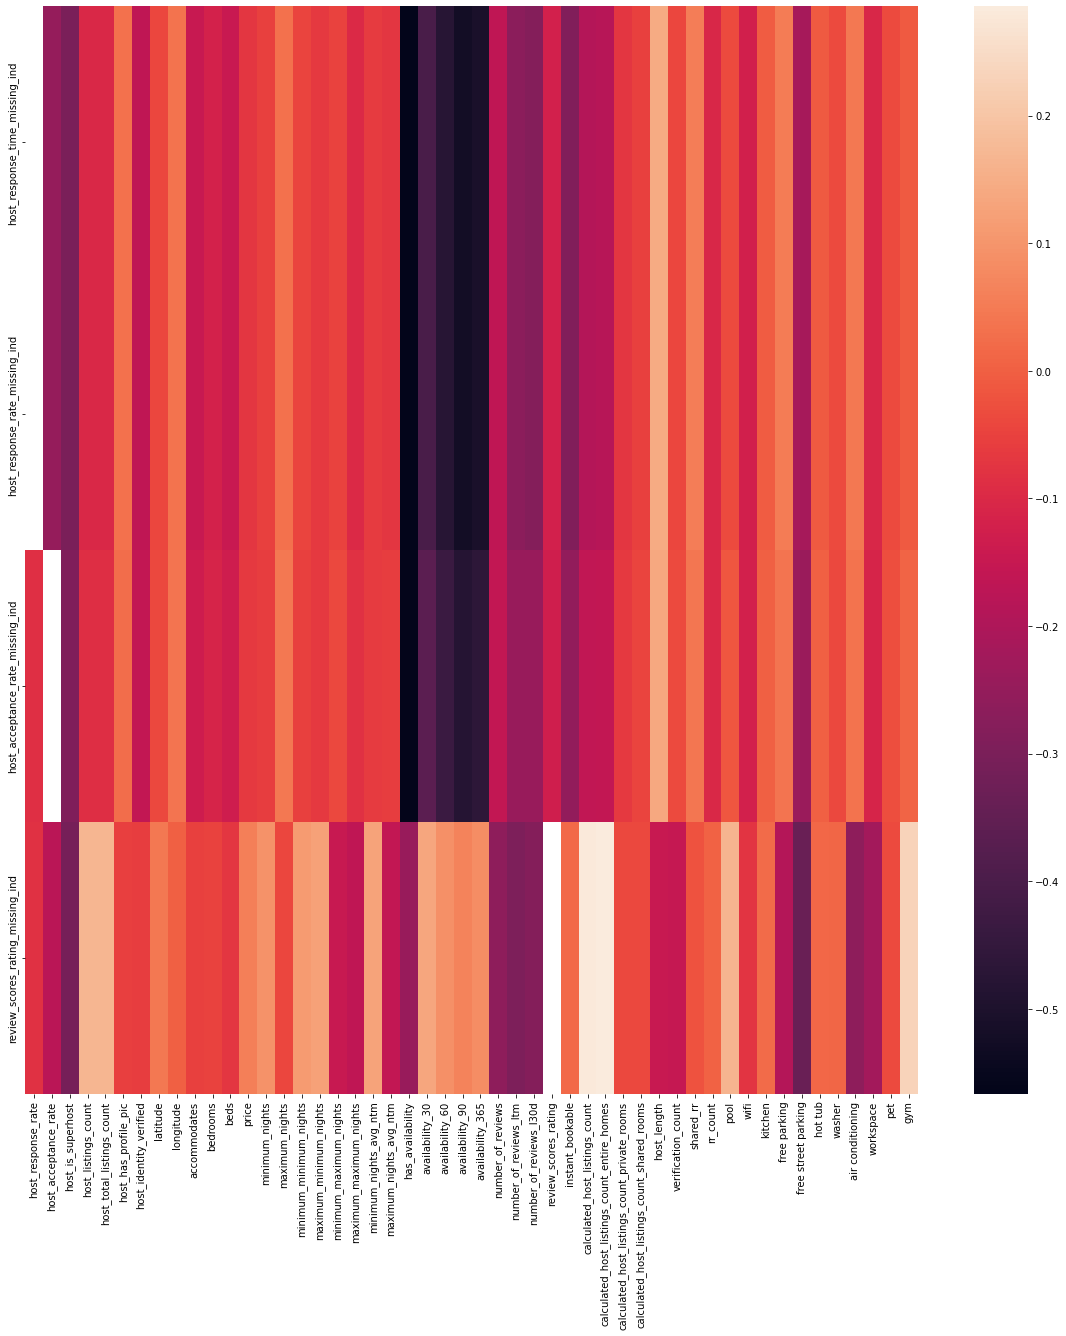

In [753]:
#review columns with higher missing values
missing_inds = ['host_response_time_missing_ind', 'host_response_rate_missing_ind', 'host_acceptance_rate_missing_ind', 
                'review_scores_rating_missing_ind']
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr().iloc[-4:, :-4])

In [754]:
df_corr_ind = train_df.corr().iloc[-4:,:-4]
df_corr_ind = df_corr_ind.abs().unstack().reset_index().rename(columns={0: 'Corr'}).sort_values(
    by='Corr', ascending=False)
df_corr_ind[df_corr_ind['Corr'] >= 0.30]

,level_0,level_1,Corr
85,has_availability,host_response_rate_missing_ind,0.566490
84,has_availability,host_response_time_missing_ind,0.566490
86,has_availability,host_acceptance_rate_missing_ind,0.562892
96,availability_90,host_response_time_missing_ind,0.525877
97,availability_90,host_response_rate_missing_ind,0.525877
100,availability_365,host_response_time_missing_ind,0.509409
101,availability_365,host_response_rate_missing_ind,0.509409
98,availability_90,host_acceptance_rate_missing_ind,0.480646
92,availability_60,host_response_time_missing_ind,0.478667
93,availability_60,host_response_rate_missing_ind,0.478667


From the heatmap, and correlation table we can see all of the host indicators are correlated with:
   - has_availability
   - availability_90
   - availability_365
   - availability_60
   - availability_30
   - host_is_superhost

However, **review_scores_rating_missing_ind** is correlated with **free street parking** and **host_is_superhost**. Let's look at the distributions with a closer look.

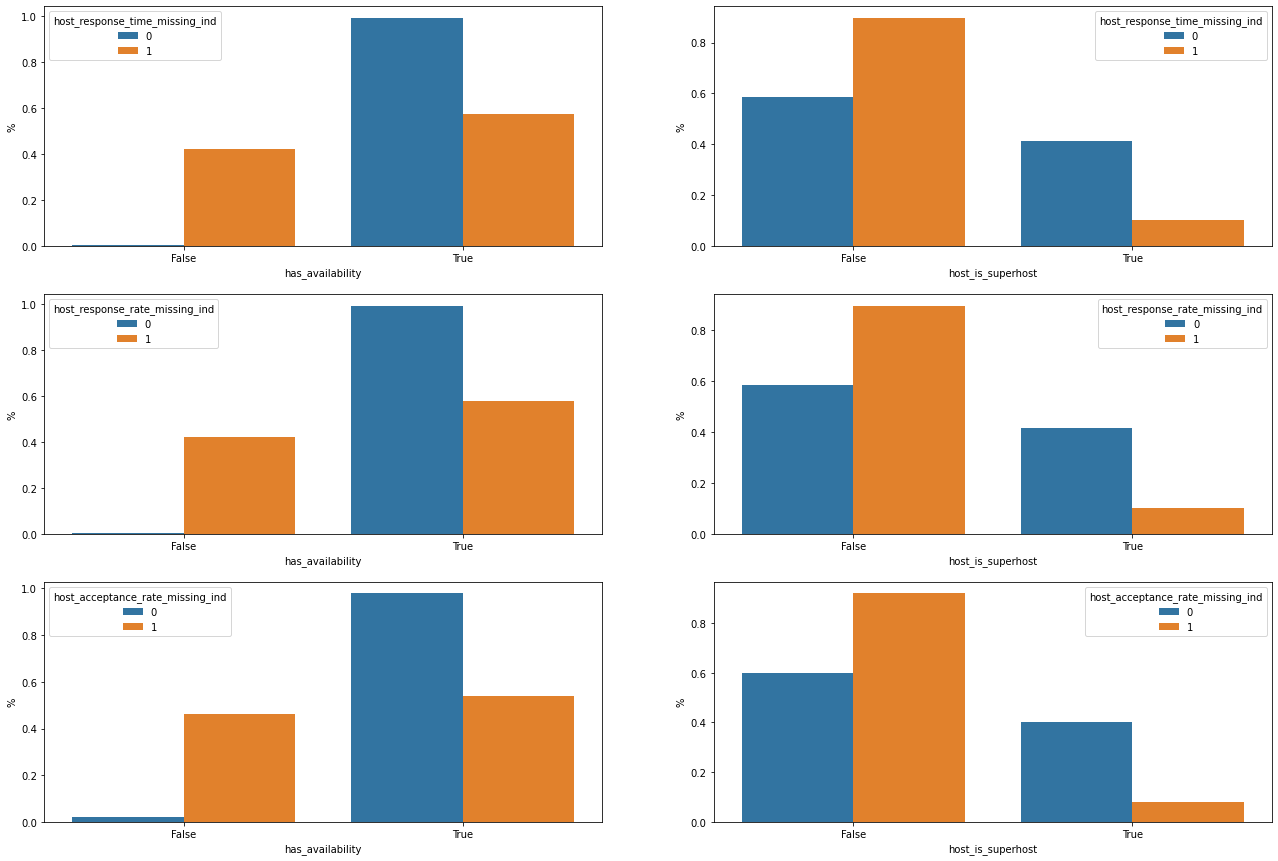

In [755]:
#plot hist for categorical predictors and % missing
fig, ax = plt.subplots(3,2, figsize=(22,15))
missing_host_inds = ['host_response_time_missing_ind', 'host_response_rate_missing_ind', 'host_acceptance_rate_missing_ind']
pred_host_names = ['has_availability', 'host_is_superhost']

for i in range(len(missing_host_inds)):
    for j in range(len(pred_host_names)):
        ind = missing_host_inds[i]
        compared = pred_host_names[j]
        crosstab = pd.crosstab(train_df[ind], train_df[compared], normalize='index')
        crosstab = crosstab.stack().reset_index().rename(columns={0:'%'})
        sns.barplot(x=compared, y='%', hue=ind, data=crosstab, ax=ax[i,j])
# missing_data_dif(missing_host_inds, pred_host_names)


When the host response time, response rate or acceptance rate are not missing the listing is available almost 100% of the time.. However, when the response rate is missing, the listing are aviailable at a slightly higher rate than when it's available. On the other, all three predictors' missingness is evenly distributed across host_is_superhost. Regardless, we can state the hosts' response time, response rate and acceptance rate are not missing at random. Understandably, the host's information may not be available after the listing's availability has closed.

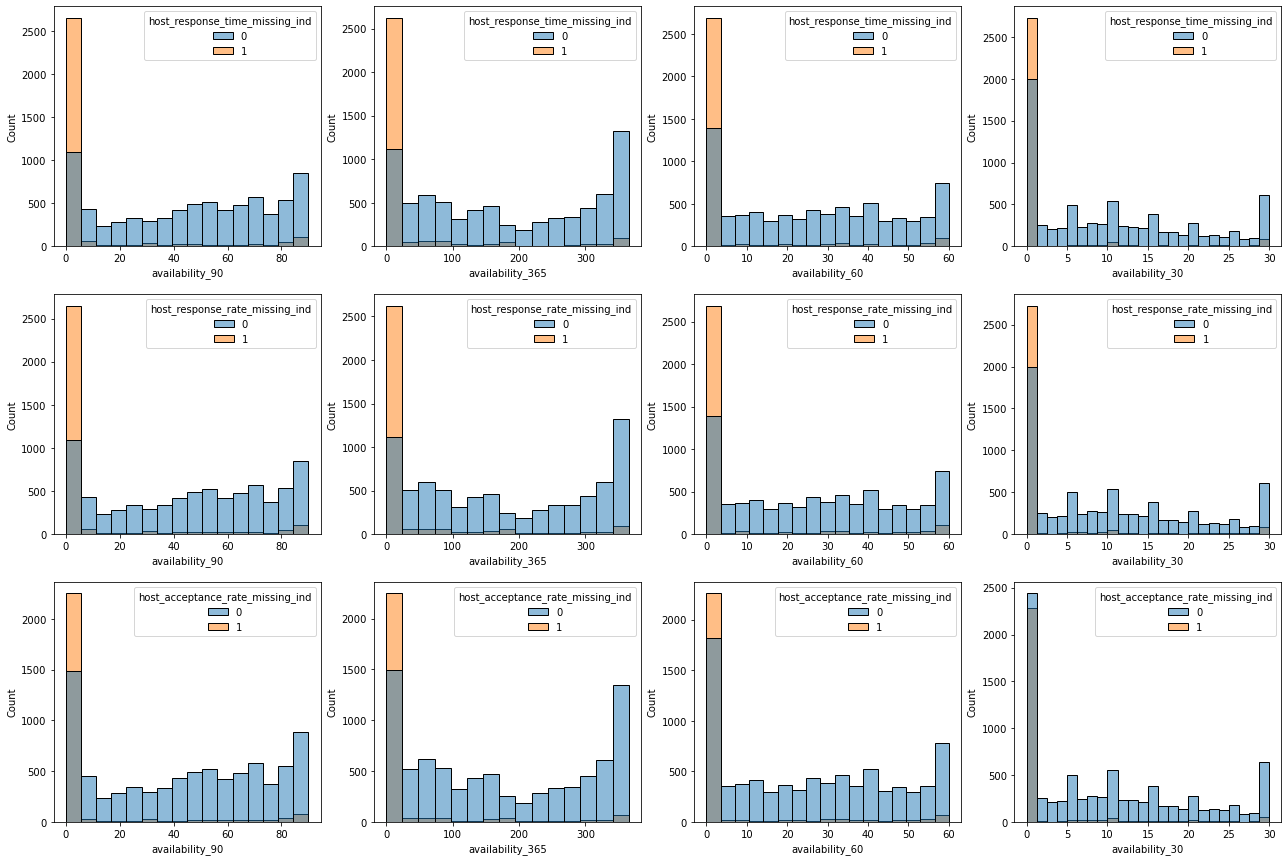

In [756]:
#plot hist for categorical variables
fig, ax = plt.subplots(3,4, figsize=(22,15))
missing_host_inds = ['host_response_time_missing_ind', 'host_response_rate_missing_ind', 'host_acceptance_rate_missing_ind']
pred_host_names = ['availability_90', 'availability_365', 'availability_60', 'availability_30']

for i in range(len(missing_host_inds)):
    for j in range(len(pred_host_names)):
        ind = missing_host_inds[i]
        compared = pred_host_names[j]
        sns.histplot(x=compared, hue=ind, data=train_df, ax=ax[i,j])

The variables for histograms represent the availability of the listing within the given timeframe. For example, **availability_90** states the number of days the listing is available within the next 90 days. Similar to **has_availability**, it's understandable that an acceptance rate is not available for listings that are not available. 

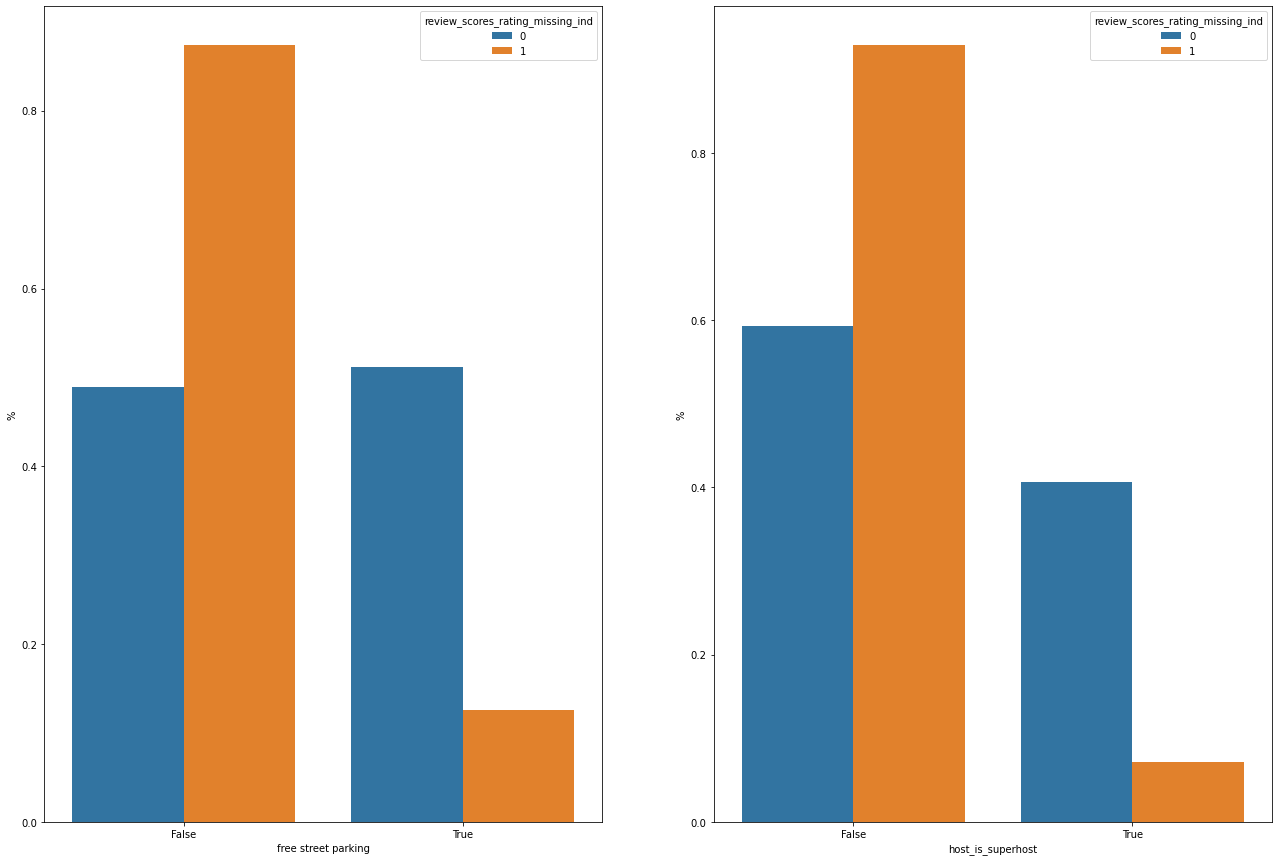

In [757]:
fig, ax = plt.subplots(1,2, figsize=(22,15))
pred_host_names = ['free street parking', 'host_is_superhost']

ind = 'review_scores_rating_missing_ind'

for i in range(len(pred_host_names)):
    compared = pred_host_names[i]
    crosstab = pd.crosstab(train_df[ind], train_df[compared], normalize='index')
    crosstab = crosstab.stack().reset_index().rename(columns={0:'%'})
    sns.barplot(x=compared, y='%', hue=ind, data=crosstab, ax=ax[i])

About 95% of the listings that didn't offer free street parking  didn't have a review rating. It is not clear why a lack of free street parking would result in missing review ratings. Similarly, about 90% of listings missing a review rating didn't have a superhost. A superhost is considered one of the top Airbnb hosts around. Because of that, they must meet strict requirements.  According to Airbnb's requirement https://www.airbnb.com/help/article/829/how-to-become-a-superhost, a superhost must maintain a 4.8 overall rating over the past 365 days. Thus, superhosts would more than likely ask for a review compared to a someone who is not. A superhost may also offer free street parking more than other hosts. We can confidently say that **review_scores_rating** is missing at random.

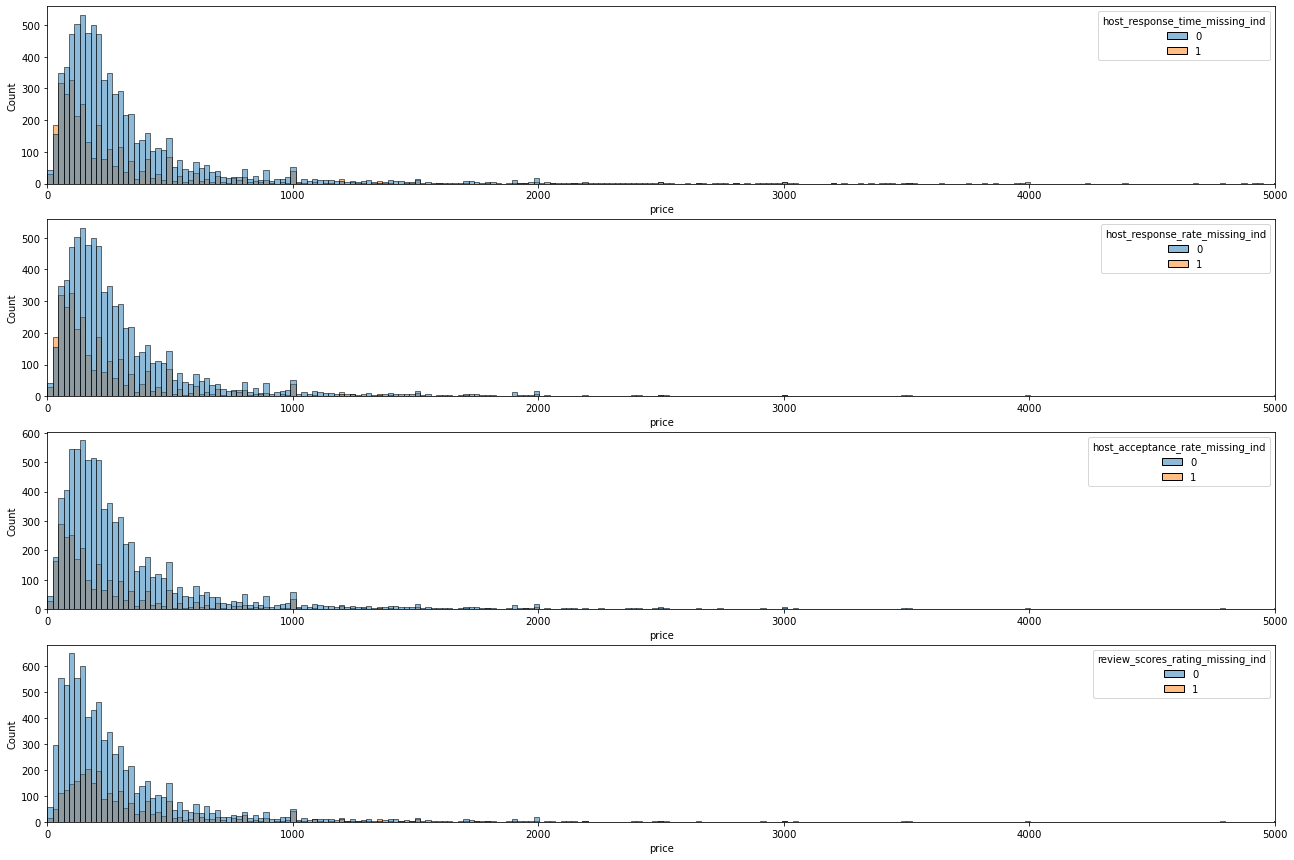

In [758]:
fig, ax = plt.subplots(4,1, figsize=(22,15))
ax[0].set_xlim([0,5000])
ax[1].set_xlim([0,5000])
ax[2].set_xlim([0,5000])
ax[3].set_xlim([0,5000])

missing_host_inds = ['host_response_time_missing_ind', 'host_response_rate_missing_ind', 'host_acceptance_rate_missing_ind', 'review_scores_rating_missing_ind']

compared = 'price'

for i in range(len(missing_host_inds)):
    ind = missing_host_inds[i]
    sns.histplot(x=compared, hue=ind, data=train_df, ax=ax[i])

In [759]:
train_df[train_df['price'] > 5000]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_length,verification_count,shared_rr,rr_count,pool,wifi,kitchen,free parking,free street parking,hot tub,washer,air conditioning,workspace,pet,gym,host_response_time_missing_ind,host_response_rate_missing_ind,host_acceptance_rate_missing_ind,review_scores_rating_missing_ind
7413,within an hour,100.0,89.0,False,79.0,79.0,True,True,30.281880,-97.758260,Entire home/apt,10,4.0,5.0,5160.0,1,365,1.0,3.0,365.0,365.0,2.4,365.0,True,17,41,66,336,5,5,0,4.80,True,74,74,0,0,1846,9,False,3.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
6507,a few days or more,0.0,NaN,False,0.0,0.0,True,True,30.260650,-97.723150,Private room,2,2.0,1.0,10000.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,30,60,90,365,0,0,0,NaN,True,1,0,1,0,787,2,False,1.0,False,True,False,False,False,False,False,True,False,False,False,0,0,1,1
7982,within an hour,100.0,89.0,False,79.0,79.0,True,True,30.308520,-97.794120,Entire home/apt,12,5.0,7.0,5665.0,1,365,2.0,4.0,365.0,365.0,2.6,365.0,True,30,60,90,365,0,0,0,NaN,True,74,74,0,0,1846,9,False,5.5,True,True,True,True,False,False,True,True,True,False,False,0,0,0,1
10559,within a day,91.0,85.0,True,0.0,0.0,True,True,30.256270,-97.735410,Entire home/apt,16,13.0,23.0,20000.0,3,7,3.0,3.0,7.0,7.0,3.0,7.0,True,7,7,7,260,0,0,0,NaN,False,8,3,5,0,725,7,False,7.5,True,True,True,True,False,False,True,True,True,False,False,0,0,0,1
10663,a few days or more,0.0,75.0,False,0.0,0.0,True,True,30.263700,-97.731680,Private room,4,1.0,1.0,10000.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,True,30,60,90,364,0,0,0,NaN,True,1,0,1,0,877,2,False,1.0,True,True,False,False,False,False,False,True,True,False,False,0,0,0,1
3307,within an hour,100.0,100.0,True,1.0,1.0,True,True,30.255440,-97.734230,Entire home/apt,10,5.0,12.0,5178.0,1,1125,2.0,8.0,365.0,1125.0,2.2,382.5,True,14,38,60,327,67,30,2,4.99,True,1,1,0,0,2607,10,False,2.0,False,True,True,True,True,True,True,True,False,True,False,0,0,0,0
7800,within a day,91.0,85.0,True,0.0,0.0,True,True,30.255370,-97.734030,Entire home/apt,14,6.0,7.0,9000.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,True,15,27,32,182,16,16,0,4.88,False,8,3,5,0,725,7,False,4.0,True,True,True,True,False,False,True,True,True,False,False,0,0,0,0
3157,within an hour,100.0,89.0,False,79.0,79.0,True,True,30.245750,-97.743060,Entire home/apt,10,4.0,6.0,5099.0,3,365,3.0,3.0,365.0,365.0,3.0,365.0,True,30,60,90,364,1,0,0,5.00,True,74,74,0,0,1846,9,False,3.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
3713,NaN,NaN,NaN,False,1.0,1.0,True,True,30.268090,-97.749710,Entire home/apt,5,1.0,3.0,10000.0,500,1125,500.0,500.0,1125.0,1125.0,500.0,1125.0,True,30,60,90,180,1,0,0,5.00,False,1,1,0,0,4057,7,False,1.0,True,True,True,False,False,False,True,True,True,False,True,1,1,1,0
4515,within an hour,99.0,100.0,True,13.0,13.0,True,True,30.264810,-97.728910,Entire home/apt,16,15.0,39.0,5367.0,1,365,1.0,5.0,1125.0,1125.0,1.0,1125.0,True,0,2,2,127,4,2,0,5.00,True,12,12,0,0,3903,10,False,10.5,True,True,True,True,True,False,True,True,True,False,False,0,0,0,0


A majority of the listings have a price of $5000 or less. Therefore, our histogram wil show prices between 0 and 500. All data points above 5000 are shown in the dataframe. The distribution for each of the four factors is fairly similar. The difference isn't enough to say price is related to the missingness of the four factors. Another important characteristic to notice is our reponse (price) is heavily skewed to the right. We will keep this in mind for later.

## Summary of Missingness Findings

- The missingness of all three host characteristics are highly dependent on the **has_availability** predictor. Also, it we know a listings availability is dependent on the **has_availability** predictor. For now, we will leave these predictors. However, we will keep this in mind when we begin building our model.
- We will impute **host_response_rate**,  **host_acceptance_rate** and **review_scores_rating** with the median of the non-null values conditional of the listing's availability.
- We will impute **host_response_time** randomly based on the current distribution values conditioned on **has_availability*


In [760]:
train_df.head(10)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_length,verification_count,shared_rr,rr_count,pool,wifi,kitchen,free parking,free street parking,hot tub,washer,air conditioning,workspace,pet,gym,host_response_time_missing_ind,host_response_rate_missing_ind,host_acceptance_rate_missing_ind,review_scores_rating_missing_ind
1069,NaN,NaN,NaN,False,1.0,1.0,True,True,30.23557,-97.71059,Entire home/apt,7,3.0,3.0,215.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,True,0,0,0,0,1,0,0,5.00,False,1,1,0,0,2594,4,False,3.0,False,True,True,True,False,False,True,True,True,False,False,1,1,1,0
604,NaN,NaN,NaN,False,1.0,1.0,True,False,30.29925,-97.73819,Entire home/apt,10,4.0,6.0,1200.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,False,0,0,0,0,0,0,0,NaN,False,1,1,0,0,2948,2,False,3.0,False,True,True,True,False,False,True,True,False,False,False,1,1,1,1
5181,within a few hours,80.0,91.0,False,1.0,1.0,True,False,30.16034,-97.74524,Entire home/apt,8,4.0,10.0,299.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,18,48,78,78,40,14,1,4.87,False,1,1,0,0,1112,2,False,2.5,False,True,True,True,True,False,True,True,False,False,False,0,0,0,0
5432,within an hour,100.0,100.0,True,1.0,1.0,True,True,30.39592,-97.69668,Entire home/apt,10,4.0,4.0,442.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,0,7,10,35,32,16,0,4.84,False,1,1,0,0,1359,4,False,2.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
2832,NaN,NaN,NaN,False,1.0,1.0,True,False,30.28678,-97.74868,Entire home/apt,2,2.0,2.0,60.0,1,7,1.0,1.0,7.0,7.0,1.0,7.0,False,0,0,0,0,3,0,0,4.33,False,1,1,0,0,1838,4,False,2.0,False,True,True,True,False,False,False,True,True,False,False,1,1,1,0
1288,within an hour,100.0,100.0,False,28.0,28.0,True,True,30.26408,-97.74026,Entire home/apt,8,3.0,5.0,326.0,1,180,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,8,16,24,221,151,24,1,4.46,True,27,27,0,0,3334,5,False,2.0,True,True,True,True,False,False,True,True,False,False,False,0,0,0,0
5538,within a few hours,100.0,91.0,False,31.0,31.0,True,True,30.23825,-97.73566,Private room,2,1.0,1.0,57.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,0,23,53,327,26,3,0,4.33,True,31,6,25,0,1013,4,False,1.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
2442,NaN,NaN,NaN,False,2.0,2.0,True,True,30.26554,-97.74321,Entire home/apt,4,1.0,1.0,699.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,False,0,0,0,0,0,0,0,NaN,False,2,2,0,0,2406,5,False,1.0,True,True,True,False,False,True,True,True,True,False,True,1,1,1,1
6824,within an hour,100.0,97.0,False,0.0,0.0,True,True,30.29038,-97.66159,Private room,2,1.0,1.0,49.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,6,32,62,331,50,38,4,4.52,False,2,0,2,0,2066,6,True,1.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
2770,NaN,NaN,NaN,False,1.0,1.0,True,True,30.25192,-97.72700,Entire home/apt,4,2.0,2.0,350.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,False,0,0,0,0,6,0,0,5.00,False,1,1,0,0,2956,8,False,2.0,False,True,True,True,False,False,True,True,True,False,False,1,1,1,0


In [761]:
# get median of the three missing continuous predictors for the two levels of availability
continuous_missing = ['host_response_rate', 'host_acceptance_rate', 'review_scores_rating']
cont_val_counts = train_df.value_counts('has_availability', normalize=True) * 100
cont_val_groupby = train_df.groupby(['has_availability'])[continuous_missing].median()
cont_missing_counts = pd.concat([cont_val_counts, cont_val_groupby], axis=1).rename(columns={0: "% of Non-null"})
cont_missing_counts

,% of Non-null,host_response_rate,host_acceptance_rate,review_scores_rating
has_availability,,,,
True,87.309692,100.0,98.0,4.92
False,12.690308,0.0,0.0,5.00


In [762]:
response_time_crosstab = pd.crosstab(train_df['has_availability'], train_df['host_response_time'], normalize="index")
response_time_counts = pd.concat([cont_val_counts, response_time_crosstab], axis=1).rename(columns={0: "% of Non-null Host Response"})
response_time_vals = response_time_counts.columns
response_time_counts

,% of Non-null Host Response,a few days or more,within a day,within a few hours,within an hour
has_availability,,,,,
True,87.309692,0.010122,0.070330,0.112791,0.806757
False,12.690308,0.647059,0.156863,0.039216,0.156863


When the listing is available the median host response rate is 100% and the median host acceptance rate is 98% with a 4.92 rating. However, when the the the listing is not available, the median response rate and acceptance rate is 0 with a rating for reviews.

Also, hosts tend to respond to inquiries when the listing is available. However, they will take much longer to respond when it is not.

We will impute the median of the hosts response rate, host acceptance rate and review rating conditioned on the availability of the listing. To impute the host response time, we will use the distribution of response time conditioned on the availability of the listing. Then, to maintain some randomness, we will generate a random variable. Whichever range the random value falls into, we will imput that factor. For example, using our **impute_response_time()** method, if our listing was available and we generate a random number of 12, we would categorize the observation as 'within a few hours'.

In [763]:
def impute_continuous(row, col):
    """
        Function to apply for each row. Will impute the correct value based on the 'has_availability' predictor
        
        row : the row to apply the function
        col: the column we are filling missing values
    """
    
    if col == 'host_response_rate':
        if row['has_availability'] == True:
            return 100.0
        else:
            return 0
    if col == 'host_acceptance_rate':
        if row['has_availability'] == True:
            return 98.0
        else:
            return 0
    if col == 'review_scores_rating':
        if row['has_availability'] == True:
            return 4.92
        else:
            return 5.00

In [764]:
np.random.seed(20059)

def impute_response_time(row, response_vals):
    rand_num = np.random.randint(101)

    if row['has_availability'] == True:
        if rand_num <= 1:
            return response_vals[1]
        elif rand_num <= 8:
            return response_vals[2]
        elif rand_num <= 19:
            return response_vals[3]
        else:
            return response_vals[4]
        
    else:
        if rand_num <= 64.7:
            return response_vals[1]
        elif rand_num <= 80.4:
            return response_vals[2]
        elif rand_num <= 84.3:
            return response_vals[3]
        else:
            return response_vals[4]

In [765]:
np.random.seed(24024)
for df1 in (df_list):
    for cont in continuous_missing:
        df1[cont] = df1.apply(lambda row: impute_continuous(row, cont) if np.isnan(row[cont]) else row[cont], axis=1)

    df1['host_response_time'] = df1.apply(
        lambda row: impute_response_time(row, response_time_vals) if row['host_response_time'] != row['host_response_time'] 
        else row['host_response_time'], axis=1)

In [766]:
train_df.head(10)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_length,verification_count,shared_rr,rr_count,pool,wifi,kitchen,free parking,free street parking,hot tub,washer,air conditioning,workspace,pet,gym,host_response_time_missing_ind,host_response_rate_missing_ind,host_acceptance_rate_missing_ind,review_scores_rating_missing_ind
1069,within an hour,100.0,98.0,False,1.0,1.0,True,True,30.23557,-97.71059,Entire home/apt,7,3.0,3.0,215.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,True,0,0,0,0,1,0,0,5.00,False,1,1,0,0,2594,4,False,3.0,False,True,True,True,False,False,True,True,True,False,False,1,1,1,0
604,a few days or more,0.0,0.0,False,1.0,1.0,True,False,30.29925,-97.73819,Entire home/apt,10,4.0,6.0,1200.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,False,0,0,0,0,0,0,0,5.00,False,1,1,0,0,2948,2,False,3.0,False,True,True,True,False,False,True,True,False,False,False,1,1,1,1
5181,within a few hours,80.0,91.0,False,1.0,1.0,True,False,30.16034,-97.74524,Entire home/apt,8,4.0,10.0,299.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,18,48,78,78,40,14,1,4.87,False,1,1,0,0,1112,2,False,2.5,False,True,True,True,True,False,True,True,False,False,False,0,0,0,0
5432,within an hour,100.0,100.0,True,1.0,1.0,True,True,30.39592,-97.69668,Entire home/apt,10,4.0,4.0,442.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,0,7,10,35,32,16,0,4.84,False,1,1,0,0,1359,4,False,2.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
2832,within an hour,0.0,0.0,False,1.0,1.0,True,False,30.28678,-97.74868,Entire home/apt,2,2.0,2.0,60.0,1,7,1.0,1.0,7.0,7.0,1.0,7.0,False,0,0,0,0,3,0,0,4.33,False,1,1,0,0,1838,4,False,2.0,False,True,True,True,False,False,False,True,True,False,False,1,1,1,0
1288,within an hour,100.0,100.0,False,28.0,28.0,True,True,30.26408,-97.74026,Entire home/apt,8,3.0,5.0,326.0,1,180,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,8,16,24,221,151,24,1,4.46,True,27,27,0,0,3334,5,False,2.0,True,True,True,True,False,False,True,True,False,False,False,0,0,0,0
5538,within a few hours,100.0,91.0,False,31.0,31.0,True,True,30.23825,-97.73566,Private room,2,1.0,1.0,57.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,0,23,53,327,26,3,0,4.33,True,31,6,25,0,1013,4,False,1.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
2442,a few days or more,0.0,0.0,False,2.0,2.0,True,True,30.26554,-97.74321,Entire home/apt,4,1.0,1.0,699.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,False,0,0,0,0,0,0,0,5.00,False,2,2,0,0,2406,5,False,1.0,True,True,True,False,False,True,True,True,True,False,True,1,1,1,1
6824,within an hour,100.0,97.0,False,0.0,0.0,True,True,30.29038,-97.66159,Private room,2,1.0,1.0,49.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,6,32,62,331,50,38,4,4.52,False,2,0,2,0,2066,6,True,1.0,False,True,True,True,True,False,True,True,True,False,False,0,0,0,0
2770,a few days or more,0.0,0.0,False,1.0,1.0,True,True,30.25192,-97.72700,Entire home/apt,4,2.0,2.0,350.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,False,0,0,0,0,6,0,0,5.00,False,1,1,0,0,2956,8,False,2.0,False,True,True,True,False,False,True,True,True,False,False,1,1,1,0


In [767]:
print(test_df.isnull().sum().sum())
print(train_df.isnull().sum().sum())

0
0


In [768]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 1069 to 8812
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            10772 non-null  object 
 1   host_response_rate                            10772 non-null  float64
 2   host_acceptance_rate                          10772 non-null  float64
 3   host_is_superhost                             10772 non-null  bool   
 4   host_listings_count                           10772 non-null  float64
 5   host_total_listings_count                     10772 non-null  float64
 6   host_has_profile_pic                          10772 non-null  bool   
 7   host_identity_verified                        10772 non-null  bool   
 8   latitude                                      10772 non-null  float64
 9   longitude                                     10772 non-nul

Our datasets are now cleaned with no missing values. We can now explore our data.

## Data Exploration
Based on my own experiences, I have the following assumptions:
- Less than 50% of the listings are hosted by superhosts
- Specific areas of the city have more expensive Airbnbs
- The host having a profile pic is not related to the price of the Airbnb
- The room type is highly associated with the price
- The number of beds and price are associated with the price
- An instant bookable listing has a higher price
- A listing with a shared restroom will be much cheaper
- A listing with a pool is much more expensive than others
- A higher review rating is associated with a higher priced listing

Before we go into a deeper dive, let's looks at the correlation between our predictor (Price) and the various predictos.

In [769]:
train_df.corr().loc['price', :].abs().sort_values(ascending=False)

price                                           1.000000
rr_count                                        0.528777
bedrooms                                        0.512588
beds                                            0.492110
accommodates                                    0.475534
hot tub                                         0.166013
availability_30                                 0.155161
shared_rr                                       0.129381
availability_60                                 0.123440
availability_365                                0.122942
longitude                                       0.106312
availability_90                                 0.103292
calculated_host_listings_count_private_rooms    0.074526
host_response_time_missing_ind                  0.072854
host_response_rate_missing_ind                  0.072854
minimum_maximum_nights                          0.072697
host_acceptance_rate_missing_ind                0.064448
pool                           

We can see the number of restrooms, bedrooms, beds and accomodates are the predictors with the highest correlation. We would expect a living space with more square footage to cost more. Thus, it makes sense these 4 predictors would be highly correlated with the price.

The host length and host acceptance rate have minimal correlation with the price. We may expect a host with a higher acceptance rate to have cheaper properties: more affordable rentals may be more desired than expensive ones. The correlation with the price is surprising. Also, free_street parking and parking fail to have correlation with the price as well. The listings from this dataset are from Austin, Texas. A majority of these listings may be downtown; thus, parking may not be an important factor in an Airbnb's pricing. 

Now, let's take a look on how different predictors are correlated with each other. 

<AxesSubplot:>

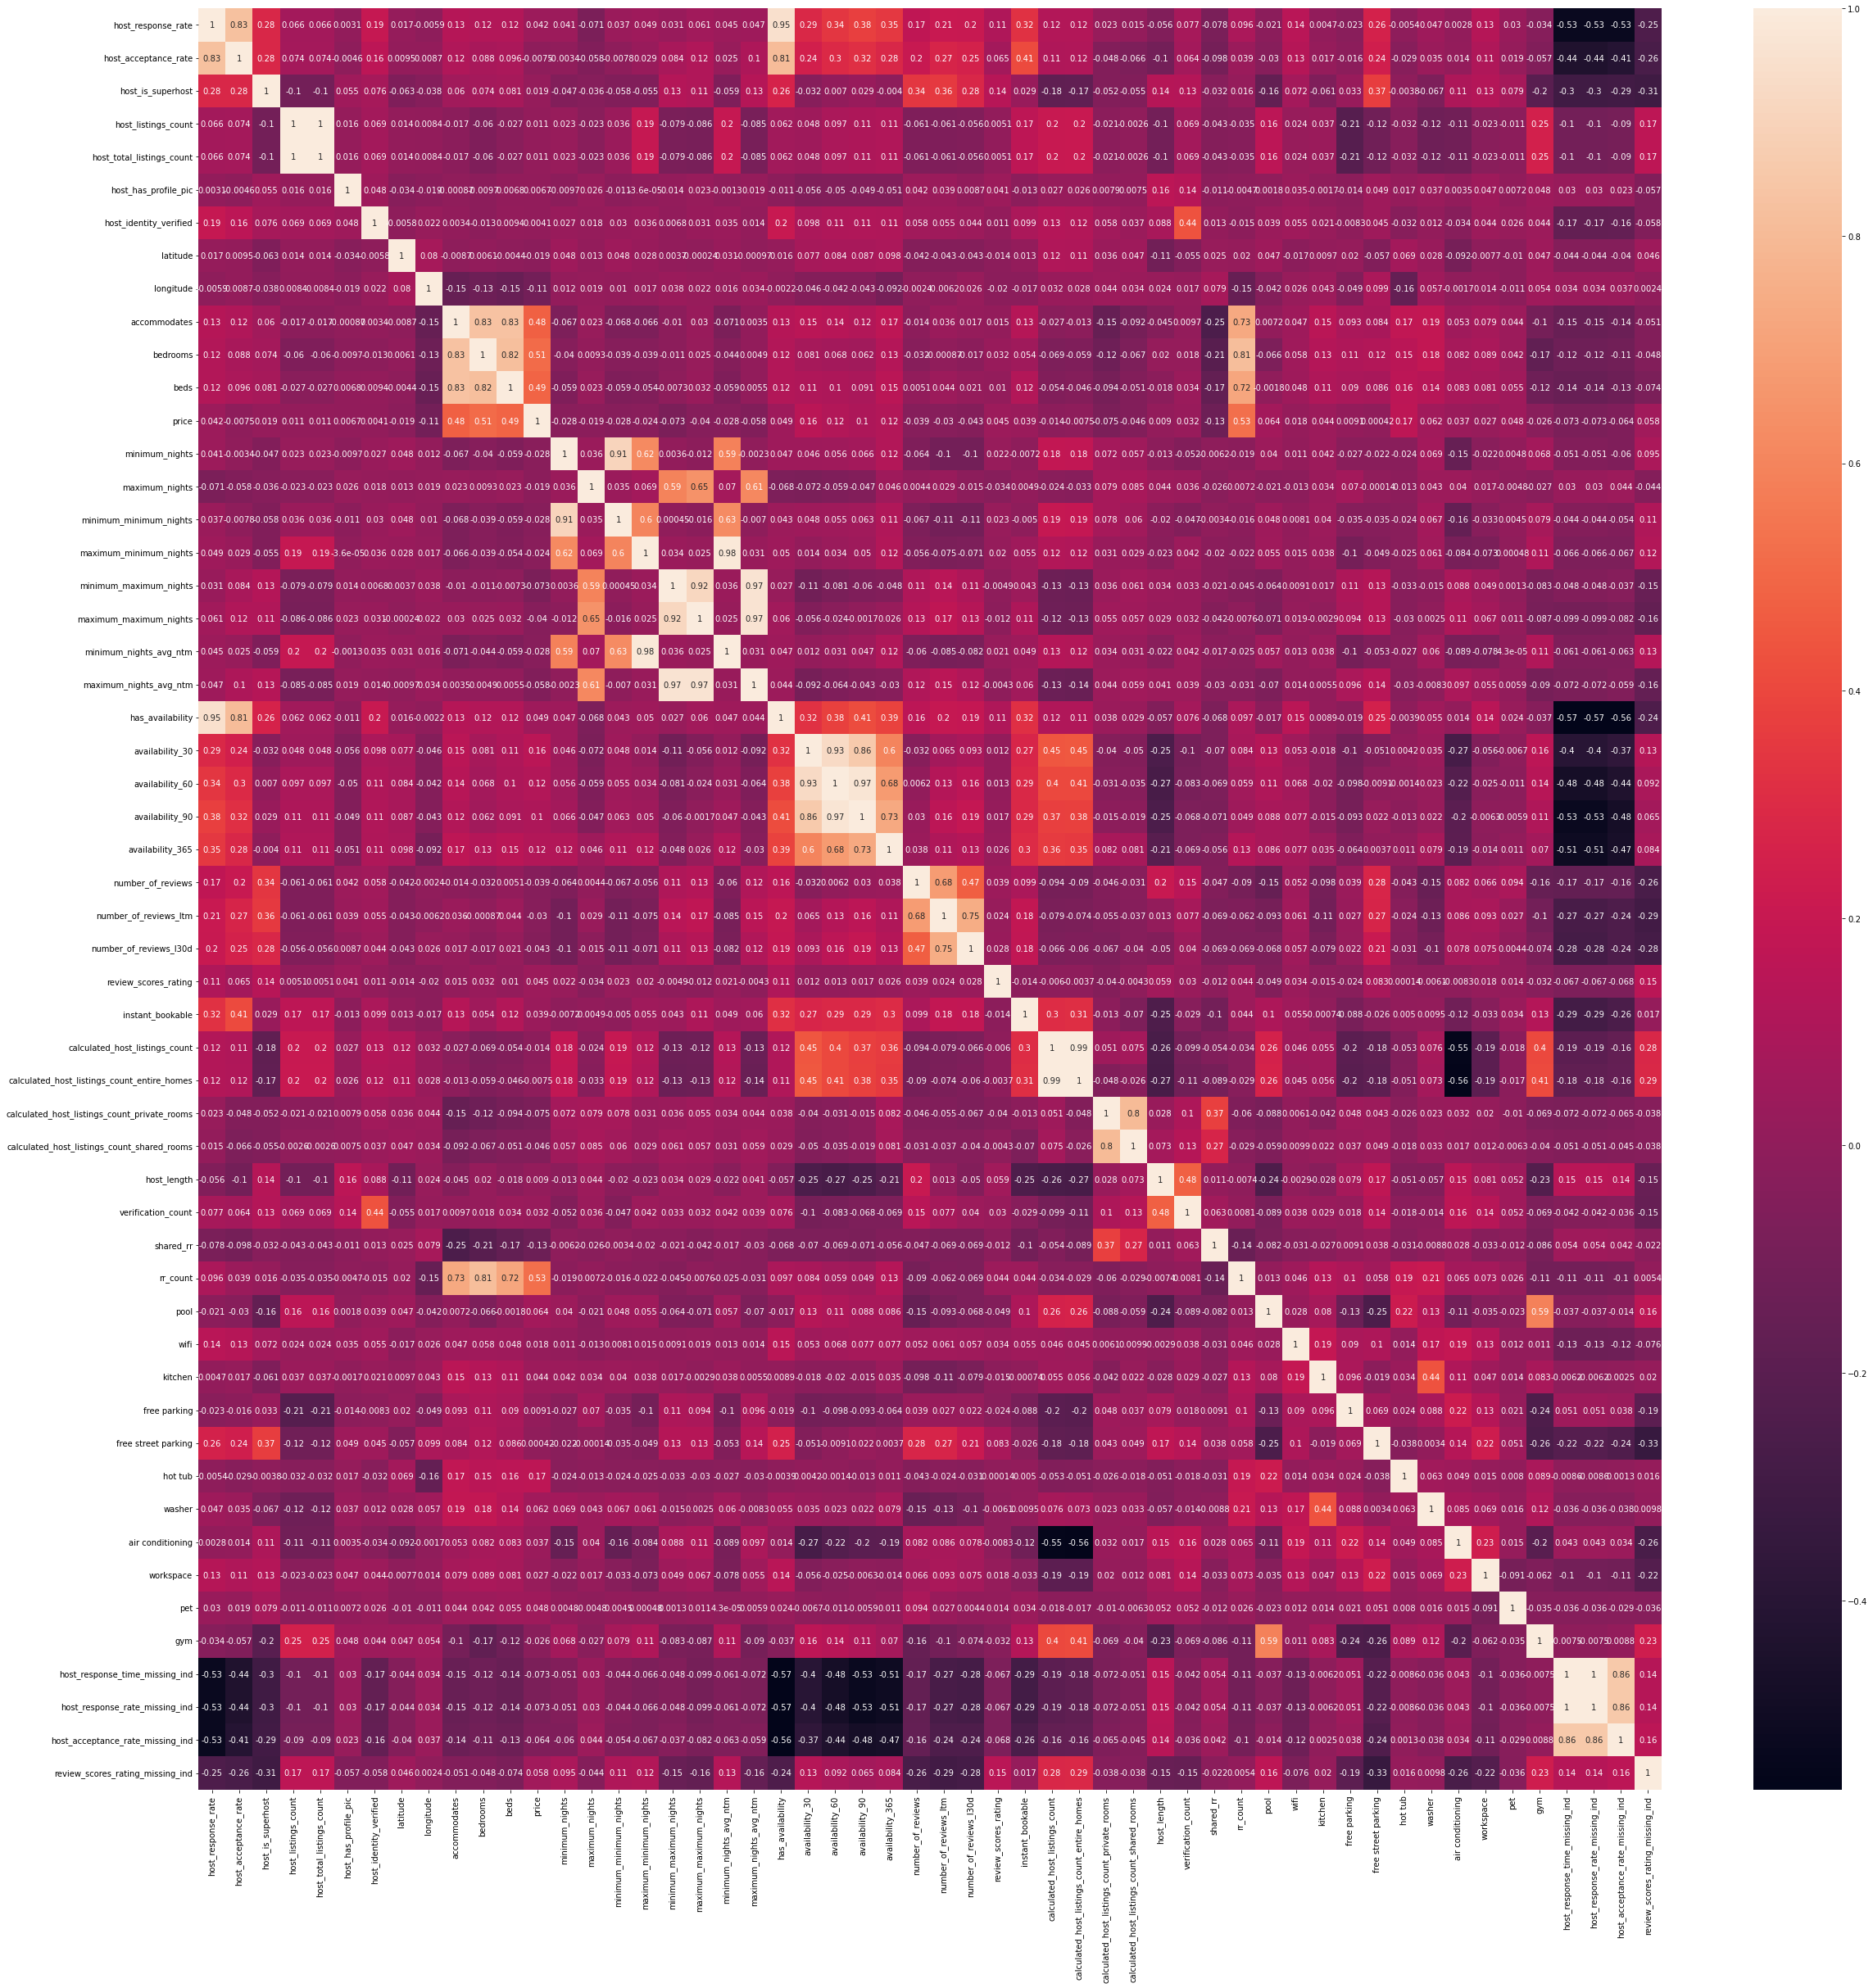

In [770]:
plt.subplots(figsize=(40,40))
sns.heatmap(train_df.corr(), annot=True)

We can see similar predictors are highly correlated with each other. For example, lets look at **minimum_nights** and **minimum_minimum_nights*. **minimum_nights** represents the minimum nights of the current listing. Airbnb also lets hosts to customize the minimum nights depending on conditions. For example, a host can allow a minimum stay of 1 day during the weekday but a minimum of 2 days during the weekend. **minimum_minimum_nights** represents the minimum nights for all conditions the host has written. Thus, we know these predictors will be highly correlated as many hosts will have the same requirement of minimum amount of nights for all timeframes. To remove redundant information we will drop the following from the data set:
- minimum_minimum_nights
- minimum_nights
- maximum_nights
- maximum_maximum_nights
- minimum_nights_avg_ntm
- maximum_nights_avg_ntm
- calculated_host_listings_count_entire_homes

Look at: 

In [771]:
drop_cols = ['minimum_minimum_nights', 'minimum_nights', 'maximum_nights', 'maximum_maximum_nights', 
             'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calculated_host_listings_count_entire_homes']
for df1 in df_list:
    df1.drop(drop_cols, axis=1, inplace=True)

In [772]:
train_df.describe(include='all')

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,price,maximum_minimum_nights,minimum_maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_length,verification_count,shared_rr,rr_count,pool,wifi,kitchen,free parking,free street parking,hot tub,washer,air conditioning,workspace,pet,gym,host_response_time_missing_ind,host_response_rate_missing_ind,host_acceptance_rate_missing_ind,review_scores_rating_missing_ind
count,10772,10772.000000,10772.000000,10772,10772.000000,10772.000000,10772,10772,10772.000000,10772.000000,10772,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,10772,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,10772,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,10772,10772.000000,10772,10772,10772,10772,10772,10772,10772,10772,10772,10772,10772,10772.000000,10772.000000,10772.000000,10772.000000
unique,4,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN
top,within an hour,NaN,NaN,False,NaN,NaN,True,True,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,NaN,False,True,True,True,False,False,True,True,True,False,False,NaN,NaN,NaN,NaN
freq,7787,NaN,NaN,7270,NaN,NaN,10671,8994,NaN,NaN,8844,NaN,NaN,NaN,NaN,NaN,NaN,9405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6334,NaN,NaN,NaN,NaN,NaN,9917,NaN,6942,10515,10085,8417,6273,9966,9222,10317,7327,10714,8524,NaN,NaN,NaN,NaN
mean,NaN,85.409395,78.283977,NaN,96.744059,96.744059,NaN,NaN,30.282547,-97.751786,NaN,4.665800,1.968344,2.524322,339.800130,11.506220,721.550037,NaN,8.268288,20.952284,35.439751,138.219365,33.839677,9.992388,0.892963,4.804892,NaN,20.072131,0.701727,0.318789,2167.443743,5.159673,NaN,1.581554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289083,0.289083,0.239974,0.243130
std,NaN,33.604222,34.927364,NaN,590.684930,590.684930,NaN,NaN,0.063761,0.062971,NaN,3.036174,1.212161,2.270710,565.920205,49.434483,494.724963,NaN,9.716178,21.015531,32.733689,136.679049,73.324191,19.259274,1.799214,0.507074,NaN,61.012732,3.025480,3.731635,1034.644156,2.350129,NaN,0.878101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453357,0.453357,0.427087,0.428993
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,30.078870,-98.070940,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,10.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,99.000000,78.000000,NaN,1.000000,1.000000,NaN,NaN,30.244130,-97.769090,NaN,2.000000,1.000000,1.000000,117.000000,2.000000,90.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.820000,NaN,1.000000,0.000000,0.000000,1398.000000,3.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,100.000000,98.000000,NaN,1.000000,1.000000,NaN,NaN,30.269770,-97.742195,NaN,4.000000,2.000000,2.000000,200.000000,2.000000,1125.000000,NaN,4.000000,16.000000,33.000000,89.000000,6.000000,1.000000,0.000000,4.920000,NaN,1.000000,0.000000,0.000000,2229.000000,5.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,100.000000,99.000000,NaN,6.000000,6.000000,NaN,NaN,30.309622,-97.718430,NaN,6.000000,2.000000,3.000000,360.000000,4.000000,1125.000000,NaN,14.000000,39.000000,66

In [774]:
cat_cols = []
num_cols = []
for i in range(len(train_df.columns)):
    col = train_df.columns[i]
    if col == 'price':
        continue
    if train_df.dtypes[i].name == 'object' or train_df.dtypes[i] == 'bool':
        cat_cols.append(col)
    elif train_df.dtypes[i].name == 'int64' or train_df.dtypes[i] == 'float64':
        num_cols.append(col)
    else:
        print(col + ' has an unknown type.')

In [775]:
print(len(cat_cols) + len(num_cols))
print(len(train_df.columns) - 1)

48
48


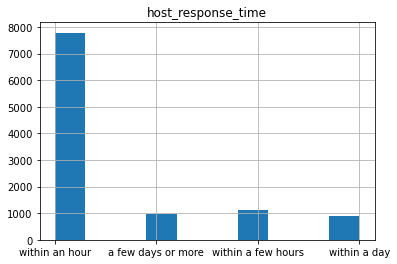

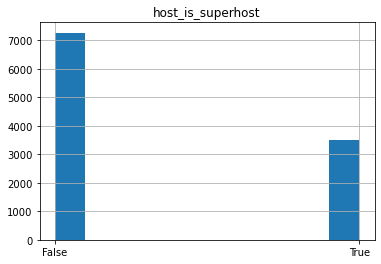

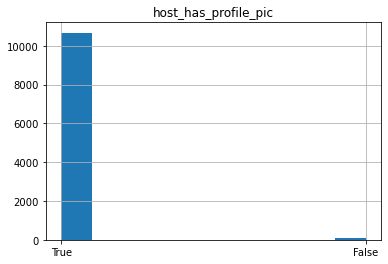

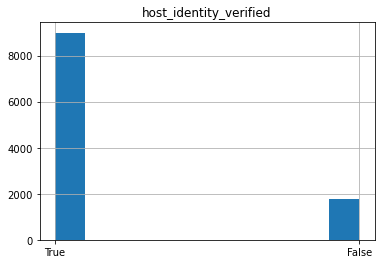

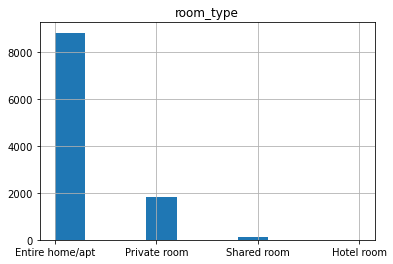

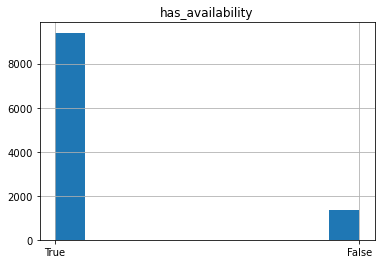

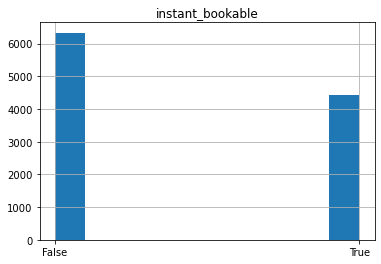

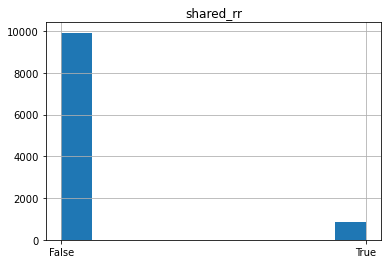

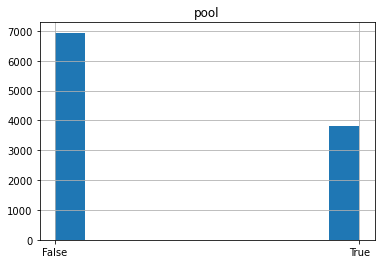

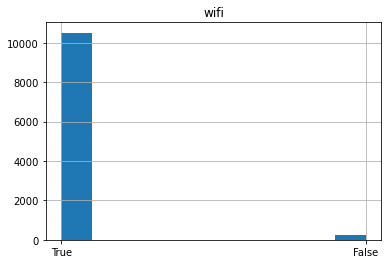

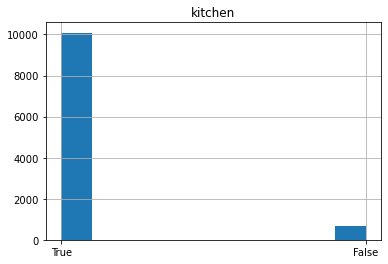

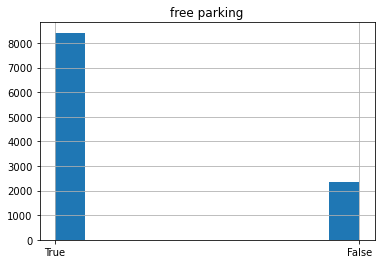

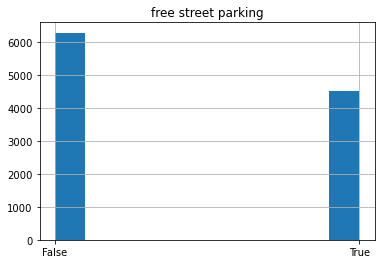

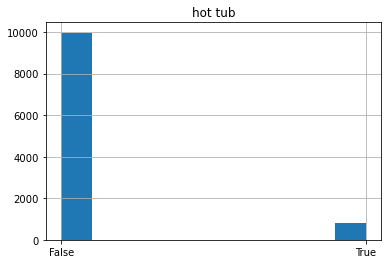

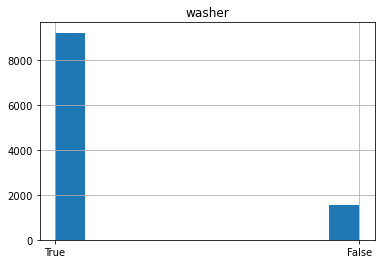

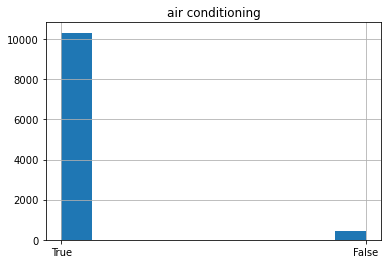

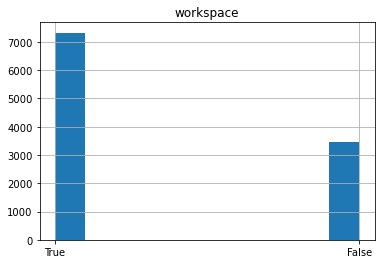

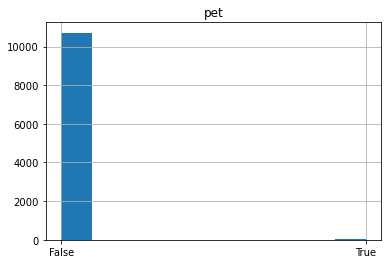

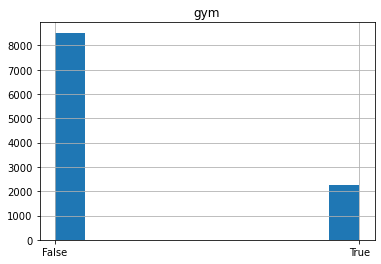

In [800]:
for col in cat_cols:
    train_df[col].astype(str).hist()
    plt.title(col)
    plt.show()

First, when looking at **host_has_profile_pic** we can see almost all of the listings have a profile pic. Also, more than 99% of the listings do not allow a **pet** on the premises. Neither variable give us much information. Therefore, we can drop both of the predictors.

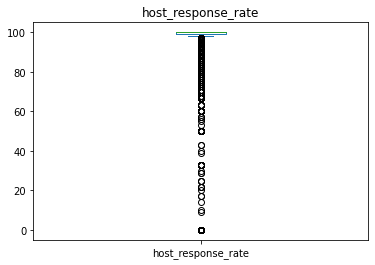

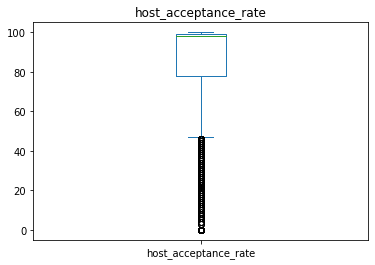

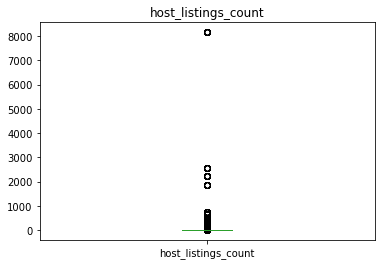

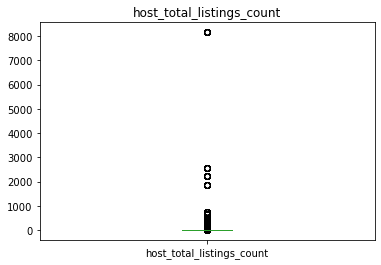

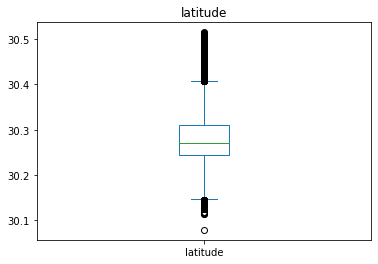

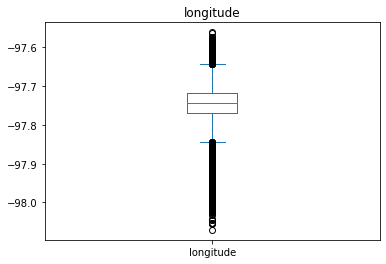

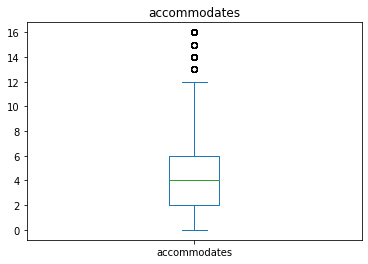

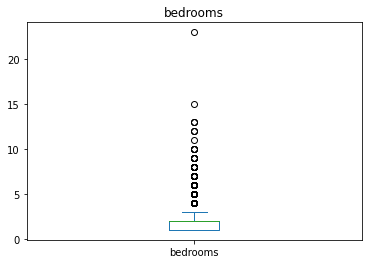

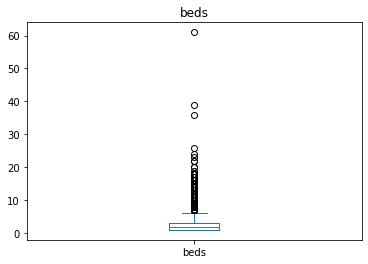

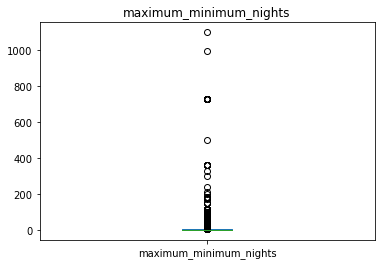

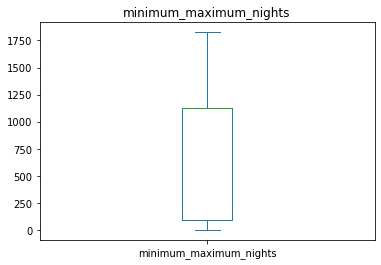

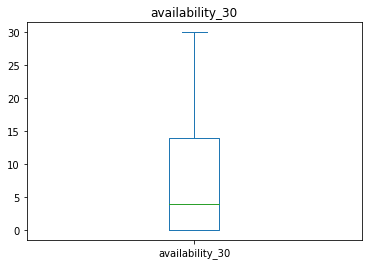

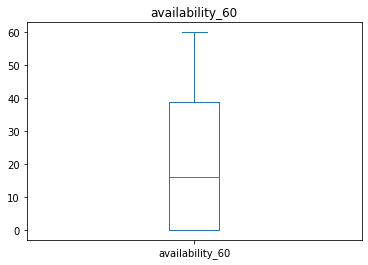

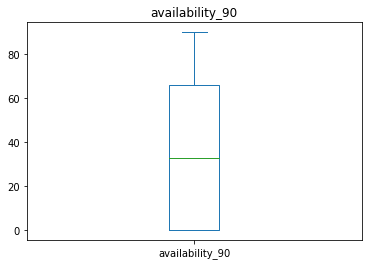

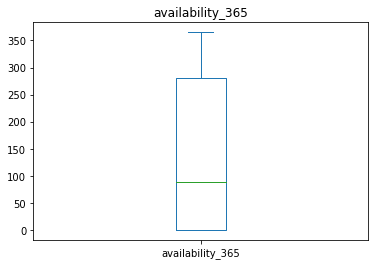

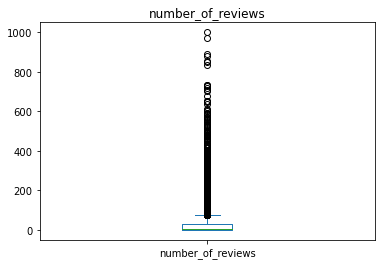

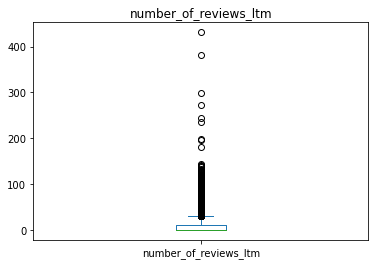

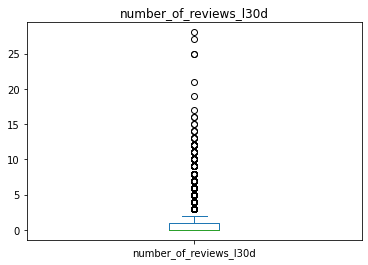

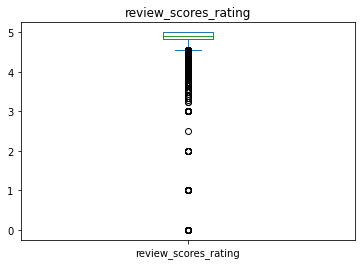

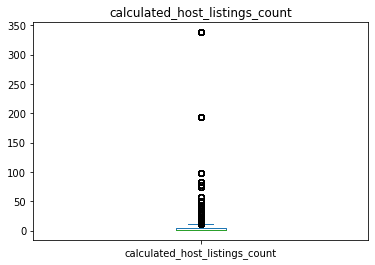

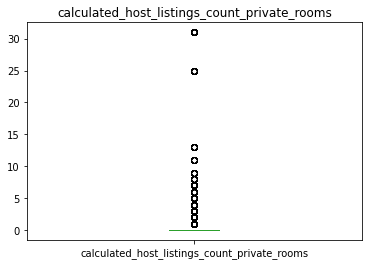

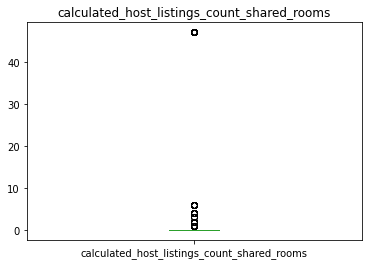

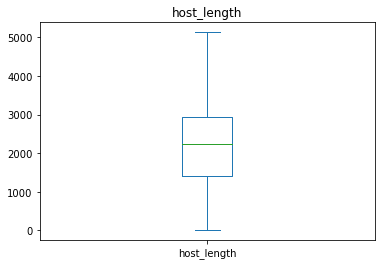

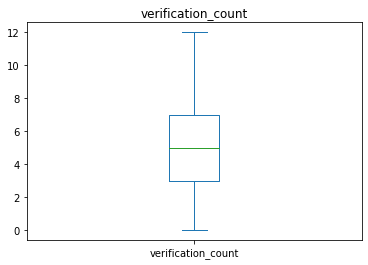

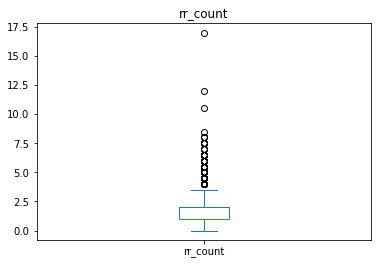

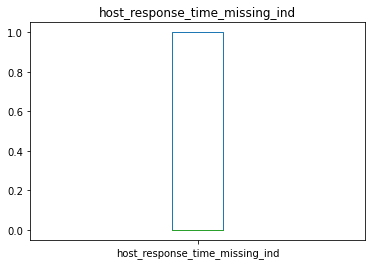

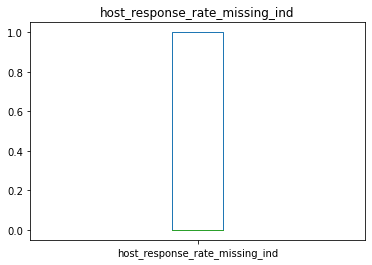

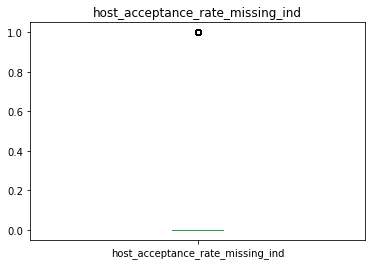

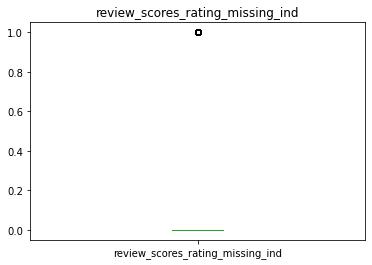

In [798]:
for col in num_cols:
    train_df[col].plot.box()
    plt.title(col)
    plt.show()

In [812]:
print('Host Response Rate:', len(train_df[train_df['host_response_rate'] == 100]))
print('Host Total Listings:', len(train_df[train_df['host_listings_count'] == 0]))
print('Calculated Host Listings Count Private Rooms:', len(train_df[train_df['calculated_host_listings_count_private_rooms'] == 0]))
print('Calculated Host Listings Count Shared Rooms:' , len(train_df[train_df['calculated_host_listings_count_shared_rooms'] == 0]))

Host Response Rate: 7897
Host Total Listings: 2247
Calculated Host Listings Count Private Rooms: 8482
Calculated Host Listings Count Shared Rooms: 10601


- Host Total Listings/ Host Listings Count (look at outlier of 8000)
- drop host_listings count shared rooms (almost 100%)
- look at calculated_host_listings_count_shared_rooms outlier
- For bivariate distribution (price vs. )
    - accommodates
    - bedrooms
    - beds
    - rr_count
- Once done with that start building regression model.